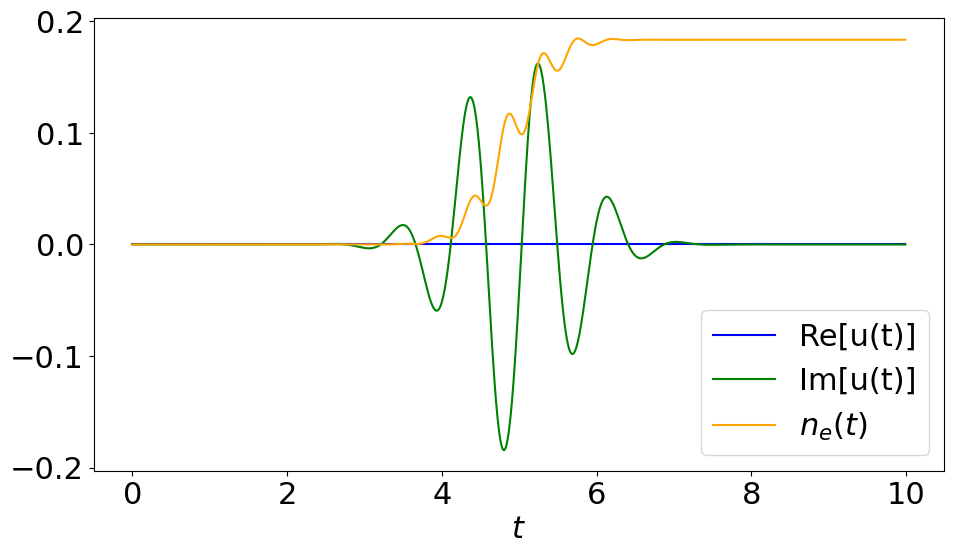

In [3]:
#Imports
import matplotlib.pyplot as plt  
import math as m  
import numpy as np 
import timeit 
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 22})

"OBEs - pulse"
def odederivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 

    dy[0] = -g_d*y[1]*np.exp(0.4)
    dy[1] = -Omega*y[1]+(gauss(t))/2*(2.*y[2]-1.)
    dy[2] = -(gauss(t))*y[1]
    return dy

def rk4(f, y, t, h):
    k1 = h * (f(y, t))
    k2 = h * (f((y+k1/2), t+h/2))
    k3 = h * (f((y+k2/2), t+h/2))
    k4 = h * (f((y+k3), (t+h)))
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

#gaussian pulse
def gauss(t):
    omega_t = Omega*np.exp(-(t-5)**2/(t_p**2))*np.sin(omega_L*t+phi)
    return omega_t


#Parameters
Omega = 2*np.pi*np.sqrt(1/np.pi) 
t_p = 1

#change parameters for w_l, detuning, dephasing
delta = 1
phi = 0
omega_L = 2*Omega
g_d = 0


dt = 0.01
tmax = 10

tlist=np.arange(0.0, tmax, dt) 
npts = len(tlist)
y=np.zeros((npts,3))
yinit = np.array([0.0,0.0,0.0]) 
y1=yinit 
y[0,:]= y1

#rk4 parameters
yrk4 = np.zeros((npts,3))
yinitrk4 = np.array([0.0,0.0,0.0])
y1rk4 = yinitrk4
yrk4[0,:] = y1rk4

#gauss parameters
t_p = 1

for i in range(1,npts):   # loop over time
    y1rk4 = rk4(odederivs, y1rk4, tlist[i-1], dt) 
    yrk4[i,:] = y1rk4

for i in range(1,npts):   # loop over time
    y1 = gauss(tlist[i-1])
    y[i,:] = y1
    
plt.plot(tlist, yrk4[:,0], color = 'blue', label = 'Re[u(t)]')
plt.plot(tlist, yrk4[:,1], color = 'green', label = 'Im[u(t)]')
plt.plot(tlist, yrk4[:,2], color = 'orange', label = '$n_e(t)$')

plt.legend(loc='lower right')
plt.xlabel('$t$')
plt.tight_layout()

plt.savefig('Q3detuning', dpi=300, bbox_inches="tight")